In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [12]:
url = "https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv"
st_data = pd.read_csv(url)
print("Data imported successfully")

st_data.head(10)

Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [13]:
st_data.shape

(25, 2)

In [14]:
st_data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [16]:
st_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [17]:
st_data.isnull()

,Hours,Scores
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
5,False,False
6,False,False
7,False,False
8,False,False
9,False,False


In [18]:
st_data.isnull().sum()

Hours     0
Scores    0
dtype: int64

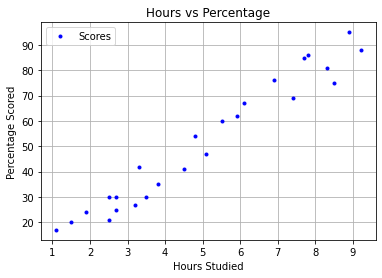

In [22]:
st_data.plot(x='Hours', y='Scores', style='b.')
plt.title('Hours vs Percentage')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Scored')
plt.grid(True)
plt.show()

In [27]:
x = st_data.iloc[:, :-1].values
y = st_data.iloc[:, 1].values

In [33]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y,
                            test_size=0.2, random_state=0)

In [34]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train, y_train)
print("Training Complete.")

Training Complete.


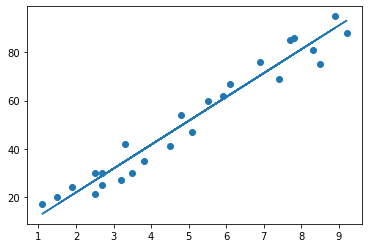

In [49]:
line = regressor.coef_*x+regressor.intercept_

plt.scatter(x, y)
plt.plot(x, line);
plt.show()

Train set score
0.9515510725211552


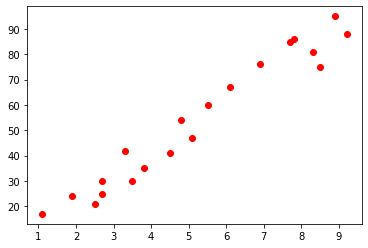

In [47]:
plt.scatter(x_train,y_train,color='r')
print("Train set score")
print(regressor.score(x_train,y_train))

Test score
0.9454906892105356


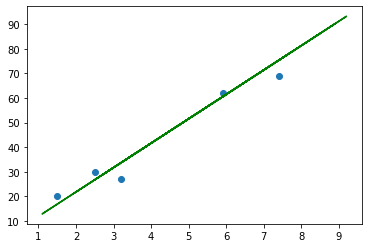

In [50]:
print("Test score")
print(regressor.score(x_test,y_test))
plt.scatter(x_test,y_test)
plt.plot(x_train,regressor.predict(x_train),color='g')

In [51]:
print(x_test) #Testing Data - In Hours
y_pred = regressor.predict(x_test) # Predicting the scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [53]:
# Comparing Actual VS Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [54]:
hours = 9.25
own_pred = regressor.predict([[hours]])
print("No of hours = {}".format(hours))
print("Predicted score = {}".format(own_pred[0]))

No of hours = 9.25
Predicted score = 93.69173248737538


In [55]:
from sklearn import metrics
print('Mean absolute error:', metrics.mean_absolute_error(y_test, y_pred))
print('R2 score:', metrics.r2_score(y_test,y_pred))

Mean absolute error: 4.183859899002975
R2 score: 0.9454906892105356


In [56]:
import joblib
joblib.dump(regressor,"gripTask1.pckl")

['gripTask1.pckl']

In [57]:
model=joblib.load("gripTask1.pckl")